In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
dataset = pd.read_csv("liver_cirrhosis - 9000rows.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,1216,C,Placebo,20597,F,N,Y,N,N,0.6,393.000000,3.45,31.0,1307.0,93.00,103.000000,227.0,10.7,1
8995,2332,C,Placebo,17167,F,Y,N,Y,N,0.7,187.000000,3.48,41.0,654.0,120.90,98.000000,475.0,13.8,1
8996,4509,C,Placebo,12109,F,N,N,Y,N,0.7,370.000000,3.78,24.0,5833.0,73.53,86.000000,200.0,10.8,1
8997,3853,D,Placebo,19025,F,N,N,N,N,0.8,248.000000,3.60,50.0,944.0,93.00,63.000000,273.0,10.6,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8999 non-null   int64  
 1   Status         8999 non-null   object 
 2   Drug           8999 non-null   object 
 3   Age            8999 non-null   int64  
 4   Sex            8999 non-null   object 
 5   Ascites        8999 non-null   object 
 6   Hepatomegaly   8999 non-null   object 
 7   Spiders        8999 non-null   object 
 8   Edema          8999 non-null   object 
 9   Bilirubin      8999 non-null   float64
 10  Cholesterol    8999 non-null   float64
 11  Albumin        8999 non-null   float64
 12  Copper         8999 non-null   float64
 13  Alk_Phos       8999 non-null   float64
 14  SGOT           8999 non-null   float64
 15  Tryglicerides  8999 non-null   float64
 16  Platelets      8999 non-null   float64
 17  Prothrombin    8999 non-null   float64
 18  Stage   

In [6]:
dataset.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1,2,4,5,6,7,8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))



In [8]:
X[:,4]

array([1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
X_train

array([[0.0, 1.0, 0.0, ..., 130.0, 313.0, 11.2],
       [1.0, 0.0, 0.0, ..., 195.0, 271.0, 9.6],
       [0.0, 0.0, 1.0, ..., 94.0, 240.0, 12.4],
       ...,
       [1.0, 0.0, 0.0, ..., 74.0, 176.0, 9.6],
       [0.0, 1.0, 0.0, ..., 118.0, 313.0, 11.2],
       [1.0, 0.0, 0.0, ..., 124.7021277, 145.0, 10.4]], dtype=object)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode the classes in y_train
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [13]:
# from sklearn.svm import SVC
# classifier=SVC(kernel='linear', random_state=0 )
# classifier.fit(X_train, y_train)
#59

In [14]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy' ,random_state = 0)
# classifier.fit(X_train, y_train)
#89

In [15]:
from xgboost import XGBClassifier
classifier = XGBClassifier()

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
y_pred = classifier.predict(X_test)

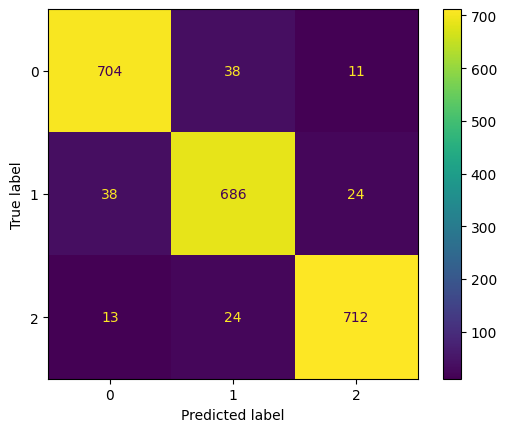

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm1)
disp.plot()
plt.show()

In [18]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.10 %
Standard Deviation: 0.80 %


In [19]:
# Applying Grid Search to find the best model and the best parameters
# Importing the required class
from sklearn.model_selection import GridSearchCV
#Defining parameters to be tuned
parameters = [{'max_depth': [3, 5, 7,10], 'n_estimators': [100, 200, 300, 400, 500, 700]}]
#Creating object of GridSearchCV class
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters,
scoring = 'accuracy', cv = 10, n_jobs = -1)
#Fitting the Grid Search to the training set
grid_search = grid_search.fit(X_train, y_train)

In [20]:
 # Getting best metric value (Mean of 10 accuracies)
best_accuracy =grid_search.best_score_
# Getting best suited parameters’ values
best_parameters = grid_search.best_params_
#Printing the metric and the parameters
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 93.47 %
Best Parameters: {'max_depth': 7, 'n_estimators': 400}


In [21]:
from sklearn.metrics import precision_score, recall_score,r2_score,f1_score,accuracy_score
accuracy = accuracy_score(y_test,y_pred)

precisionXG = precision_score(y_test,y_pred, average="weighted")
recallXG = recall_score(y_test,y_pred,average="weighted")
f1ScoreXG = f1_score(y_test,y_pred,average="weighted")

print("Accuracy:", accuracy)
print("precision: ",precisionXG)
print("recall: ",recallXG)
print("f1_score: ",f1ScoreXG)


Accuracy: 0.9342222222222222
precision:  0.934240618298556
recall:  0.9342222222222222
f1_score:  0.9342303042911562


In [22]:
# # Applying k-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [23]:
import pickle
with open('liver.pkl','wb') as files:
    pickle.dump(classifier,files)